In [24]:
from TTRBoard import Board
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
import sys
import numpy as np

print('\npython version ' + sys.version)
print('networkx version ' + nx.__version__)

board = Board()

ImportError: No module named 'sklearn'

In [24]:
# list of edges in the network
paths = board.getEdges()
print(paths)

[('Helena', 'Winnipeg'), ('Helena', 'Seattle'), ('Helena', 'Denver'), ('Helena', 'Salt Lake City'), ('Helena', 'Calgary'), ('Helena', 'Omaha'), ('Helena', 'Duluth'), ('Houston', 'El Paso'), ('Houston', 'Dallas'), ('Houston', 'New Orleans'), ('Portland', 'Salt Lake City'), ('Portland', 'Seattle'), ('Portland', 'San Francisco'), ('Charleston', 'Miami'), ('Charleston', 'Atlanta'), ('Charleston', 'Raleigh'), ('Saint Louis', 'Nashville'), ('Saint Louis', 'Pittsburgh'), ('Saint Louis', 'Kansas City'), ('Saint Louis', 'Chicago'), ('Saint Louis', 'Little Rock'), ('Little Rock', 'Oklahoma City'), ('Little Rock', 'Nashville'), ('Little Rock', 'Dallas'), ('Little Rock', 'New Orleans'), ('Atlanta', 'Nashville'), ('Atlanta', 'Miami'), ('Atlanta', 'New Orleans'), ('Atlanta', 'Raleigh'), ('Dallas', 'El Paso'), ('Dallas', 'Oklahoma City'), ('Phoenix', 'Los Angeles'), ('Phoenix', 'El Paso'), ('Phoenix', 'Santa Fe'), ('Toronto', 'Pittsburgh'), ('Toronto', 'Chicago'), ('Toronto', 'Duluth'), ('Toronto', '

In [19]:
#get the distance between two cities, or their weight
city1 = "Chicago"
city2 = "Duluth"
weight = board.getEdgeWeight(city1, city2)
color = board.getEdgeColors(city1, city2)
print("Path between {} and {} has a weight of {} and is color {}".format(city1, city2, weight, color[0]))

Path between Chicago and Duluth has a weight of 3 and is color red


In [4]:
G = board.returnGraph()

#degree of each city
degrees = G.degree()

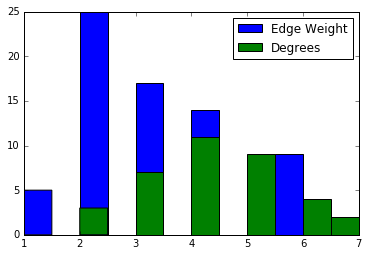

In [30]:
#histogram of degrees and weights for all nodes
%matplotlib inline
d = []
p = []
for key in degrees:
    d.append(degrees[key])
for key in paths:
    p.append(board.getEdgeWeight(key[0],key[1]))

plt.hist(p, label="Edge Weight")
plt.hist(d, label="Degrees")
plt.legend(loc='upper right')

In [4]:
O = nx.transitivity(G)
print(O)

0.3617021276595745


In [37]:
#node clustering co-efficient for each city
P = nx.clustering(G)
print(json.dumps(P, indent=4))

{
    "Helena": 0.2857142857142857,
    "Houston": 0.3333333333333333,
    "Portland": 0.3333333333333333,
    "Charleston": 0.6666666666666666,
    "Kansas City": 0.3333333333333333,
    "Saint Louis": 0.3,
    "New York": 0.3333333333333333,
    "San Francisco": 0.3333333333333333,
    "Las Vegas": 0.0,
    "Seattle": 0.3333333333333333,
    "Toronto": 0.4,
    "Atlanta": 0.4,
    "Winnipeg": 0.5,
    "Calgary": 0.5,
    "Oklahoma City": 0.3333333333333333,
    "Salt Lake City": 0.2,
    "Sault St Marie": 0.5,
    "Montreal": 0.3333333333333333,
    "Washington": 0.6666666666666666,
    "Boston": 1.0,
    "Denver": 0.3333333333333333,
    "Nashville": 0.4,
    "Miami": 0.6666666666666666,
    "Vancouver": 1.0,
    "Duluth": 0.4,
    "Dallas": 0.5,
    "Chicago": 0.4,
    "Pittsburgh": 0.2857142857142857,
    "New Orleans": 0.16666666666666666,
    "Little Rock": 0.2,
    "Los Angeles": 0.16666666666666666,
    "El Paso": 0.3333333333333333,
    "Omaha": 0.4,
    "Raleigh": 0.4,
    "

In [12]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)

print(json.dumps(bet_cen, indent=4))

{
    "Houston": 0.0439435774309724,
    "San Francisco": 0.026114319853815654,
    "Omaha": 0.0744458285623951,
    "Montreal": 0.040540943650187365,
    "Oklahoma City": 0.13812639599473853,
    "Phoenix": 0.002636285283344107,
    "Atlanta": 0.04630136903246148,
    "Miami": 0.008416093710211358,
    "Washington": 0.009135654261704682,
    "Dallas": 0.02984962516475121,
    "Winnipeg": 0.047039790137445955,
    "Boston": 0.0,
    "Seattle": 0.03843136179202865,
    "Charleston": 0.006699346405228758,
    "Little Rock": 0.14239909451607777,
    "Denver": 0.18532928754949796,
    "El Paso": 0.09831534711786812,
    "New York": 0.043205025325638274,
    "Toronto": 0.0792253637788791,
    "Las Vegas": 0.009361618773383481,
    "Salt Lake City": 0.10938650285288942,
    "Portland": 0.013881552621048423,
    "Vancouver": 0.0,
    "Santa Fe": 0.04088881706528766,
    "Helena": 0.218637607106931,
    "Raleigh": 0.06856811974159424,
    "Nashville": 0.08111510761027943,
    "Pittsburgh": 0.1

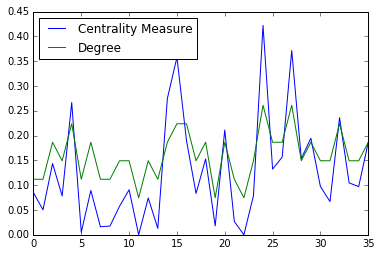

In [34]:
#plot of normalize centrality and degree for each node in the graph
cen_measures = []
degree_counts = []
xlabels = []
for key in bet_cen:
    centrality = bet_cen[key]
    degree = degrees[key]
    cen_measures.append(centrality)
    degree_counts.append(degree)
    xlabels.append(key)

cen_measures = np.array(cen_measures)
degree_counts = np.array(degree_counts)

cen_measures = cen_measures / np.linalg.norm(cen_measures)
degree_counts = degree_counts / np.linalg.norm(degree_counts)
%matplotlib inline
plt.plot(cen_measures, label="Centrality Measure")
plt.plot(degree_counts, label="Degree")
plt.legend(loc='upper left')

In [40]:
# Closeness centrality
clo_cen = nx.closeness_centrality(G)
print(json.dumps(clo_cen, indent=4))

{
    "Helena": 0.3723404255319149,
    "Houston": 0.2845528455284553,
    "Portland": 0.2692307692307692,
    "Charleston": 0.2517985611510791,
    "Kansas City": 0.3804347826086957,
    "Saint Louis": 0.3763440860215054,
    "New York": 0.28,
    "San Francisco": 0.28225806451612906,
    "Las Vegas": 0.2755905511811024,
    "Seattle": 0.2892561983471074,
    "Toronto": 0.33980582524271846,
    "Atlanta": 0.28688524590163933,
    "Winnipeg": 0.32407407407407407,
    "Calgary": 0.29411764705882354,
    "Oklahoma City": 0.3723404255319149,
    "Salt Lake City": 0.330188679245283,
    "Sault St Marie": 0.30973451327433627,
    "Montreal": 0.2734375,
    "Washington": 0.28,
    "Boston": 0.23972602739726026,
    "Denver": 0.3888888888888889,
    "Nashville": 0.33980582524271846,
    "Miami": 0.25547445255474455,
    "Vancouver": 0.2348993288590604,
    "Duluth": 0.3645833333333333,
    "Dallas": 0.330188679245283,
    "Chicago": 0.3723404255319149,
    "Pittsburgh": 0.35,
    "New Orleans

In [56]:
#Top 5 cities with highest closeness centrality
top_clo_cen = dict(sorted(clo_cen.items(), key=lambda x: x[1], reverse=True)[:5])

print(json.dumps(top_clo_cen, indent=4))

{
    "Helena": 0.3723404255319149,
    "Saint Louis": 0.3763440860215054,
    "Omaha": 0.3763440860215054,
    "Denver": 0.3888888888888889,
    "Kansas City": 0.3804347826086957
}


In [55]:
#Top 5 cities with highest betweeness centrality
top_bet_cen = dict(sorted(bet_cen.items(), key=lambda x: x[1], reverse=True)[:5])

print(json.dumps(top_bet_cen, indent=4))

{
    "Helena": 0.218637607106931,
    "Pittsburgh": 0.19241435251093078,
    "Oklahoma City": 0.13812639599473855,
    "Denver": 0.18532928754949793,
    "Little Rock": 0.14239909451607774
}


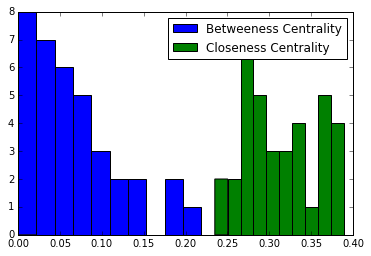

In [60]:
#histogram of degrees and weights for all nodes
%matplotlib inline
bet = []
clo = []
for key in bet_cen:
    bet.append(bet_cen[key])
for key in clo_cen:
    clo.append(clo_cen[key])

plt.hist(bet, label="Betweeness Centrality")
plt.hist(clo, label="Closeness Centrality")
plt.legend(loc='upper right')

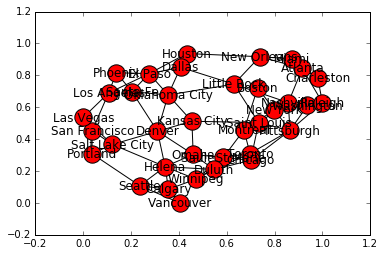

In [72]:
#visualization of graph
#nx.draw(G)
nx.draw_networkx(G)

In [75]:
def avg_neigh_degree(g):
    data = {}
    for n in g.nodes():
        if g.degree(n):
            data[n] = float(sum(g.degree(i) for i in g[n]))/g.degree(n)
    return data
avg_neigh_degree(G)

{'Atlanta': 4.0,
 'Boston': 4.0,
 'Calgary': 4.25,
 'Charleston': 4.333333333333333,
 'Chicago': 5.6,
 'Dallas': 5.0,
 'Denver': 5.166666666666667,
 'Duluth': 5.0,
 'El Paso': 4.0,
 'Helena': 4.857142857142857,
 'Houston': 4.666666666666667,
 'Kansas City': 5.5,
 'Las Vegas': 4.5,
 'Little Rock': 4.8,
 'Los Angeles': 3.5,
 'Miami': 4.0,
 'Montreal': 3.75,
 'Nashville': 5.4,
 'New Orleans': 4.0,
 'New York': 4.0,
 'Oklahoma City': 4.833333333333333,
 'Omaha': 5.6,
 'Phoenix': 4.666666666666667,
 'Pittsburgh': 4.571428571428571,
 'Portland': 4.0,
 'Raleigh': 4.6,
 'Saint Louis': 5.2,
 'Salt Lake City': 4.2,
 'San Francisco': 4.0,
 'Santa Fe': 5.25,
 'Sault St Marie': 4.75,
 'Seattle': 4.0,
 'Toronto': 5.2,
 'Vancouver': 4.0,
 'Washington': 5.333333333333333,
 'Winnipeg': 5.25}

In [79]:
#connectivity for each node to every other node in the graph
nx.all_pairs_node_connectivity(G)

{'Atlanta': {'Boston': 2,
  'Calgary': 3,
  'Charleston': 3,
  'Chicago': 3,
  'Dallas': 3,
  'Denver': 3,
  'Duluth': 3,
  'El Paso': 3,
  'Helena': 3,
  'Houston': 3,
  'Kansas City': 3,
  'Las Vegas': 2,
  'Little Rock': 3,
  'Los Angeles': 3,
  'Miami': 3,
  'Montreal': 3,
  'Nashville': 3,
  'New Orleans': 4,
  'New York': 3,
  'Oklahoma City': 3,
  'Omaha': 3,
  'Phoenix': 3,
  'Pittsburgh': 3,
  'Portland': 3,
  'Raleigh': 4,
  'Saint Louis': 3,
  'Salt Lake City': 3,
  'San Francisco': 3,
  'Santa Fe': 3,
  'Sault St Marie': 3,
  'Seattle': 3,
  'Toronto': 3,
  'Vancouver': 2,
  'Washington': 3,
  'Winnipeg': 3},
 'Boston': {'Atlanta': 2,
  'Calgary': 2,
  'Charleston': 2,
  'Chicago': 2,
  'Dallas': 2,
  'Denver': 2,
  'Duluth': 2,
  'El Paso': 2,
  'Helena': 2,
  'Houston': 2,
  'Kansas City': 2,
  'Las Vegas': 2,
  'Little Rock': 2,
  'Los Angeles': 2,
  'Miami': 2,
  'Montreal': 2,
  'Nashville': 2,
  'New Orleans': 2,
  'New York': 2,
  'Oklahoma City': 2,
  'Omaha': 2,
  